In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('places_visit.csv')
df

,City,Latitude,Longitude,places
0,Aamby Valley City,18.5726,73.4049,places_visit/1.json
1,Abhaneri,27.0056,76.6102,places_visit/2.json
2,Achooranam,11.5934,76.0131,places_visit/3.json
3,Acharapakkam,12.4077,79.8170,places_visit/4.json
4,Achrol,27.1330,75.9567,places_visit/5.json
...,...,...,...,...
193,Bhavani,11.4471,77.6840,places_visit/194.json
194,Bhavnagar,21.7645,72.1519,places_visit/195.json
195,Bhawanipatna,19.9074,83.1642,places_visit/196.json
196,Bhilai,21.1938,81.3509,places_visit/197.json


In [14]:
import os
import pandas as pd
import json

# Assuming you have a DataFrame named df with a column named 'places' containing file paths

# Function to extract relevant information from each JSON file
def process_json_file(file_path):
    if os.path.getsize(file_path) == 0:
        print(f"Skipping empty file: {file_path}")
        return None
    
    with open(file_path, 'r') as file:
        data = json.load(file)

    #print(data)
    
    places_with_reviews = []
    for place in data["places"]:
        name = place.get("displayName", {}).get("text", "Unknown")  # Extracting name from "displayName" field
        #print(name)
        rating = place.get("rating", "Unknown")
        address = place.get("formattedAddress")
        reviews = []
        for review in place.get("reviews", []):
            # Check if the review dictionary contains a "text" field
            if "text" in review:
                review_text = review["text"]
                # Check if the review_text is a dictionary with nested "text" and "languageCode" fields
                if isinstance(review_text, dict) and "text" in review_text and "languageCode" in review_text:
                    review_info = {
                        "text": review_text["text"],  # Extracting the text
                        "languageCode": review_text["languageCode"],  # Extracting the language code
                        "rating": rating  # Include rating for each review
                    }
                    reviews.append(review_info)
        
        place_info = {
            "name": name,
            "rating": rating,
            "address": address,
            "reviews": reviews
        }
        places_with_reviews.append(place_info)
    
    return {"places_with_reviews": places_with_reviews}

# Create a new column in df to store the processed file names
df['places_process'] = ""

# Iterate over each file path in the first 198 rows of the DataFrame
for i, file_path in enumerate(df['places'][:198]):
    print(file_path)
    # Process the JSON file
    new_json_data = process_json_file(file_path)
    
    # Check if the JSON data is None (indicating an empty file)
    if new_json_data is None:
        continue
    
    # Extract the current file name
    file_name = os.path.basename(file_path)
    
    # Create a new JSON file path with a dynamic name
    new_file_name = file_name.replace('.json', '_short.json')
    new_file_path = os.path.join(os.path.dirname(file_path), new_file_name)
    
    # Write the new JSON data to the new file
    with open(new_file_path, 'w') as new_file:
        json.dump(new_json_data, new_file, indent=2)

    # Update the value in the 'places_process' column with the new file name
    df.at[i, 'places_process'] = new_file_name

    print(f"Processed: {file_path}. Created: {new_file_path}")

print("All files processed.")


/tmp/ipykernel_29279/2683832962.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['places_process'] = ""


places_visit/1.json
Processed: places_visit/1.json. Created: places_visit/1_short.json
places_visit/2.json
Processed: places_visit/2.json. Created: places_visit/2_short.json
places_visit/3.json
Processed: places_visit/3.json. Created: places_visit/3_short.json
places_visit/4.json
Processed: places_visit/4.json. Created: places_visit/4_short.json
places_visit/5.json
Processed: places_visit/5.json. Created: places_visit/5_short.json
places_visit/6.json
Processed: places_visit/6.json. Created: places_visit/6_short.json
places_visit/7.json
Processed: places_visit/7.json. Created: places_visit/7_short.json
places_visit/8.json
Processed: places_visit/8.json. Created: places_visit/8_short.json
places_visit/9.json
Processed: places_visit/9.json. Created: places_visit/9_short.json
places_visit/10.json
Processed: places_visit/10.json. Created: places_visit/10_short.json
places_visit/11.json
Processed: places_visit/11.json. Created: places_visit/11_short.json
places_visit/12.json
Processed: place

In [15]:
df

,City,Latitude,Longitude,places,places_process
0,Aamby Valley City,18.5726,73.4049,places_visit/1.json,1_short.json
1,Abhaneri,27.0056,76.6102,places_visit/2.json,2_short.json
2,Achooranam,11.5934,76.0131,places_visit/3.json,3_short.json
3,Acharapakkam,12.4077,79.8170,places_visit/4.json,4_short.json
4,Achrol,27.1330,75.9567,places_visit/5.json,5_short.json
...,...,...,...,...,...
193,Bhavani,11.4471,77.6840,places_visit/194.json,194_short.json
194,Bhavnagar,21.7645,72.1519,places_visit/195.json,195_short.json
195,Bhawanipatna,19.9074,83.1642,places_visit/196.json,196_short.json
196,Bhilai,21.1938,81.3509,places_visit/197.json,197_short.json


In [21]:
import json
import os
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from bs4 import BeautifulSoup
import string
import re

# Slice the DataFrame to keep only the first 198 rows
df = df.head(198)

def preprocess_text(text):
    def preprocess_review(review):
        # Remove non-ASCII characters
        review = re.sub(r'[^\x00-\x7F]+', ' ', review)
        # Remove punctuation and symbols, convert to lowercase
        review = re.sub(r'[^\w\s]', ' ', review).lower()
        # Remove duplicate words and stopwords
        stopwords = ['place']  # Add other stopwords as needed
        review = " ".join(word for word in set(review.split()) if word not in stopwords)
        return review

    # Decode Unicode escape sequences
    text = text.encode().decode('unicode-escape')
    
    # Remove HTML tags using Beautiful Soup
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)
    
    # Apply review preprocessing function
    preprocessed_text = preprocess_review(preprocessed_text)
    
    return preprocessed_text

# Create a list to store the new file paths
new_file_paths = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Read the JSON file specified in the 'hotel_process' column
    if index in [48]:
        new_file_paths.append("")
        continue
    file_path = os.path.join("places_visit", row['places_process'])
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Check if the 'places_with_reviews' key exists and it is not empty
    if 'places_with_reviews' in data and data['places_with_reviews']:
        # Preprocess the reviews for each place in the JSON data
        for place in data['places_with_reviews']:
            preprocessed_reviews = []
            for review in place['reviews']:
                # Check if review is a string and not equal to "No review text available"
                if isinstance(review, dict) and 'text' in review and review['text'] != "No review text available":
                    preprocessed_text = preprocess_text(review['text'])  # Directly preprocess the review text
                    preprocessed_reviews.append(preprocessed_text)
            
            # Add preprocessed reviews back into the JSON structure
            place['preprocessed_reviews'] = preprocessed_reviews

        # Save the updated JSON data
        output_file_path = f"places_visit/preprocessed_{row['places_process']}"
        new_file_paths.append(output_file_path)  # Append the new file path to the list
        with open(output_file_path, 'w') as output_file:
            json.dump(data, output_file, indent=4)

        print(f"Preprocessed data saved: {output_file_path}")
    else:
        print(f"Skipping empty JSON file: {file_path}")

# Add the new column to the DataFrame
df['places_final'] = new_file_paths

# Save the DataFrame to a CSV file
df.to_csv('places_final_preprocess.csv', index=False)

print("DataFrame saved to preprocessed_data.csv")


Preprocessed data saved: places_visit/preprocessed_1_short.json
Preprocessed data saved: places_visit/preprocessed_2_short.json
Preprocessed data saved: places_visit/preprocessed_3_short.json
Preprocessed data saved: places_visit/preprocessed_4_short.json
Preprocessed data saved: places_visit/preprocessed_5_short.json
Preprocessed data saved: places_visit/preprocessed_6_short.json
Preprocessed data saved: places_visit/preprocessed_7_short.json
Preprocessed data saved: places_visit/preprocessed_8_short.json
Preprocessed data saved: places_visit/preprocessed_9_short.json
Preprocessed data saved: places_visit/preprocessed_10_short.json
Preprocessed data saved: places_visit/preprocessed_11_short.json
Preprocessed data saved: places_visit/preprocessed_12_short.json
Preprocessed data saved: places_visit/preprocessed_13_short.json
Preprocessed data saved: places_visit/preprocessed_14_short.json
Preprocessed data saved: places_visit/preprocessed_15_short.json
Preprocessed data saved: places_vi

In [22]:
df

,City,Latitude,Longitude,places,places_process,places_final
0,Aamby Valley City,18.5726,73.4049,places_visit/1.json,1_short.json,places_visit/preprocessed_1_short.json
1,Abhaneri,27.0056,76.6102,places_visit/2.json,2_short.json,places_visit/preprocessed_2_short.json
2,Achooranam,11.5934,76.0131,places_visit/3.json,3_short.json,places_visit/preprocessed_3_short.json
3,Acharapakkam,12.4077,79.8170,places_visit/4.json,4_short.json,places_visit/preprocessed_4_short.json
4,Achrol,27.1330,75.9567,places_visit/5.json,5_short.json,places_visit/preprocessed_5_short.json
...,...,...,...,...,...,...
193,Bhavani,11.4471,77.6840,places_visit/194.json,194_short.json,places_visit/preprocessed_194_short.json
194,Bhavnagar,21.7645,72.1519,places_visit/195.json,195_short.json,places_visit/preprocessed_195_short.json
195,Bhawanipatna,19.9074,83.1642,places_visit/196.json,196_short.json,places_visit/preprocessed_196_short.json
196,Bhilai,21.1938,81.3509,places_visit/197.json,197_short.json,places_visit/preprocessed_197_short.json


PLACES TO VISIT RANKING

In [23]:
df = pd.read_csv('places_final_preprocess.csv')
df

,City,Latitude,Longitude,places,places_process,places_final
0,Aamby Valley City,18.5726,73.4049,places_visit/1.json,1_short.json,places_visit/preprocessed_1_short.json
1,Abhaneri,27.0056,76.6102,places_visit/2.json,2_short.json,places_visit/preprocessed_2_short.json
2,Achooranam,11.5934,76.0131,places_visit/3.json,3_short.json,places_visit/preprocessed_3_short.json
3,Acharapakkam,12.4077,79.8170,places_visit/4.json,4_short.json,places_visit/preprocessed_4_short.json
4,Achrol,27.1330,75.9567,places_visit/5.json,5_short.json,places_visit/preprocessed_5_short.json
...,...,...,...,...,...,...
193,Bhavani,11.4471,77.6840,places_visit/194.json,194_short.json,places_visit/preprocessed_194_short.json
194,Bhavnagar,21.7645,72.1519,places_visit/195.json,195_short.json,places_visit/preprocessed_195_short.json
195,Bhawanipatna,19.9074,83.1642,places_visit/196.json,196_short.json,places_visit/preprocessed_196_short.json
196,Bhilai,21.1938,81.3509,places_visit/197.json,197_short.json,places_visit/preprocessed_197_short.json


In [37]:
import os
import json
from collections import Counter
from nltk.tokenize import word_tokenize

def process_reviews(json_file):
    good_words = []
    bad_words = []
    
    with open(json_file, 'r') as file:
        data = json.load(file)
        for place in data['places_with_reviews']:
            # Convert rating to float
            try:
                rating = float(place['rating'])
            except:
                rating = float("0")
            #print(type(rating))
            preprocessed_reviews = place['preprocessed_reviews']
        
            # Determine if review is good or bad based on rating
            is_good_review = True if rating > 3.5 else False
        
            # Tokenize and identify good and bad words
            for review in preprocessed_reviews:
                words = word_tokenize(review)
                if is_good_review:
                    good_words.extend(words)
                else:
                    bad_words.extend(words)
    
    return good_words, bad_words



# Dictionary to store aggregated good and bad words
aggregated_good_words = Counter()
aggregated_bad_words = Counter()

# Iterate through each file path
for file_path in df['places_final']:
    # Ensure the file exists
    if not isinstance(file_path, str) or not file_path:
        continue
    elif os.path.exists(file_path):
        #print(file_path)
        good_words, bad_words = process_reviews(file_path)
        aggregated_good_words.update(good_words)
        aggregated_bad_words.update(bad_words)
    else:
        print(f"File not found: {file_path}")

# Print aggregated good and bad words
print("Good words:")
print(aggregated_good_words.most_common(20))  # Print top 10 good words
print("\nBad words:")
print(aggregated_bad_words.most_common(20))   # Print top 10 bad words


Good words:
[('temple', 2285), ('visit', 1678), ('good', 1436), ('beautiful', 1196), ('one', 1157), ('nice', 1064), ('also', 972), ('time', 728), ('peaceful', 722), ('experience', 643), ('must', 635), ('best', 600), ('people', 570), ('well', 568), ('view', 519), ('like', 507), ('area', 502), ('near', 499), ('great', 477), ('available', 466)]

Bad words:
[('nice', 14), ('good', 13), ('temple', 12), ('historical', 5), ('beautiful', 5), ('old', 4), ('ancient', 4), ('mata', 4), ('one', 4), ('ok', 3), ('used', 3), ('visit', 3), ('road', 3), ('location', 3), ('take', 3), ('boat', 3), ('see', 3), ('tourist', 3), ('lake', 3), ('chandika', 3)]


In [38]:
import pickle

def save_list_to_pickle(my_list, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(my_list, file)

save_list_to_pickle(aggregated_good_words, "good_words_place.pkl")
save_list_to_pickle(aggregated_bad_words, "bad_words_place.pkl")


USER INTERACTION

In [47]:
#Read from pickle
import pickle

def read_list_from_pickle(file_path):
    with open(file_path, 'rb') as file:
        my_list = pickle.load(file)
    return my_list

good_words_counter = read_list_from_pickle("good_words.pkl")
good_words = list(good_words_counter.keys())
bad_words_counter = read_list_from_pickle("bad_words.pkl")
bad_words = list(bad_words_counter.keys())

print(good_words[:10])

['peaceful', 'retreat', 'experience', 'location', 'excellent', 'altogether', 'room', 'service', 'attractive', 'rooms']


In [48]:
# Determine the maximum length among good_words and bad_words
max_length = max(len(good_words), len(bad_words))

# Pad the shorter list with a placeholder word to match the maximum length
padding_word = "padding_word"

if len(good_words) < max_length:
    good_words += [padding_word] * (max_length - len(good_words))

if len(bad_words) < max_length:
    bad_words += [padding_word] * (max_length - len(bad_words))


In [49]:
import json
input = "Bengaluru" #take from user
df = pd.read_csv('places_final_preprocess.csv')
# Search for "Agra" in the "City" column
result = df[df['City'] == input]

# Check if there's any result
if not result.empty:
    # Get the filename from the "hotel/final" column
    filename = result.iloc[0]['places_final']

    # Load the JSON file
    with open(filename, 'r') as file:
        json_data = json.load(file)
        
    #print(json_data)  # Print or use the loaded JSON data
else:
    print("No entry found")

In [50]:
import json
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

places_with_reviews = json_data["places_with_reviews"]

all_words = good_words + bad_words
# Merge good_words and bad_words lists after converting them into sets to remove duplicates
all_words = list(set(good_words + bad_words))


# Function to remove special characters
def preprocess_review(review):
    # Remove non-ASCII characters
    review = re.sub(r'[^\x00-\x7F]+', ' ', review)
    # Remove punctuation and symbols, convert to lowercase
    review = re.sub(r'[^\w\s]', ' ', review).lower()
    # Remove duplicate words and stopwords
    stopwords = ['place']  # Add other stopwords as needed
    review = " ".join(word for word in set(review.split()) if word not in stopwords)
    return review


vectorizer = CountVectorizer(vocabulary=all_words, tokenizer=lambda text: text.split())

# Lists to store overall scores and place names
overall_scores = []
place_names = []
# List to store ranked places with original JSON objects
ranked_places_with_original = []
# Loop through each place with reviews
for place in places_with_reviews:
    place_name = place['name']
    print("Place:", place_name)
    
    # Extract reviews and preprocess them
    reviews = place['preprocessed_reviews']
    preprocessed_reviews = []
    problematic_reviews = []  # List to store problematic reviews
    for review in reviews:
        try:
            preprocessed_review = preprocess_review(review.lower())  # Fix here
            preprocessed_review = " ".join(preprocessed_review.split())
            preprocessed_reviews.append(preprocessed_review)
        except Exception as e:
            problematic_reviews.append(review)
            print("Error processing review:", review)
            print("Error message:", str(e))
    
    # Transform reviews into vectors
    #print(preprocessed_reviews)
    #print("Vocabulary:", vectorizer.get_feature_names())
    review_vectors = vectorizer.fit_transform(preprocessed_reviews)

    # Calculate cosine similarity between reviews and good/bad words
    good_similarity = cosine_similarity(review_vectors, vectorizer.transform(good_words).toarray())
    bad_similarity = cosine_similarity(review_vectors, vectorizer.transform(bad_words).toarray())

    # Calculate average rating
    avg_rating = np.mean(place['rating'])

    # Calculate overall score
    overall_score = np.mean(good_similarity - bad_similarity) + avg_rating
    
    place_copy = place.copy()  # Make a copy to avoid modifying the original object
    place_copy['overall_score'] = overall_score
    ranked_places_with_original.append(place_copy)


Place: ISKCON temple Bangalore


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Lalbagh Botanical Garden


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Bengaluru Palace


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Shivoham Shiva Temple


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Sri Karya Siddhi Anjaneya Swamy Temple


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Shri Bande Mahakali Temple (Moola udbhava Devi)


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Snow City Bengaluru


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Dr. Rajkumar Memorial


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Visvesvaraya Industrial & Technological Museum


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Place: Ragigudda Shri Prasanna Anjaneyaswami Temple


/home/drishh207/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [51]:
# Rank the places based on overall scores (higher is better)
ranked_places_with_original = sorted(ranked_places_with_original, key=lambda x: x['overall_score'], reverse=True)

# Return the ranked places along with the original JSON objects
ranked_json_object = {"places_with_reviews": ranked_places_with_original}
print(json.dumps(ranked_json_object, indent=4))

{
    "places_with_reviews": [
        {
            "name": "Sri Karya Siddhi Anjaneya Swamy Temple",
            "rating": 4.8,
            "address": "3rd C main Rd, 1st phase Girinagar, Kadavanthra, Banashankari, Bengaluru, Karnataka 560085, India",
            "reviews": [
                {
                    "text": "Wonderful experience. Once you enter u can feel positive energy. People believe whatever they prayer or ask usually through offering coconut. This coconut is tied for 16 days. It is believed that within 16 days ,our wish gets fulfilled.",
                    "languageCode": "en",
                    "rating": 4.8
                },
                {
                    "text": "Super Spiritual place\nThis place so much crowded on public holidays and Saturday Sundays. They say if we wish something and perform a puja for 16 days and tie a coconut in the temple. It will be successful that what we wished for to try a coconut. They will charge hundred rupees, and they wi

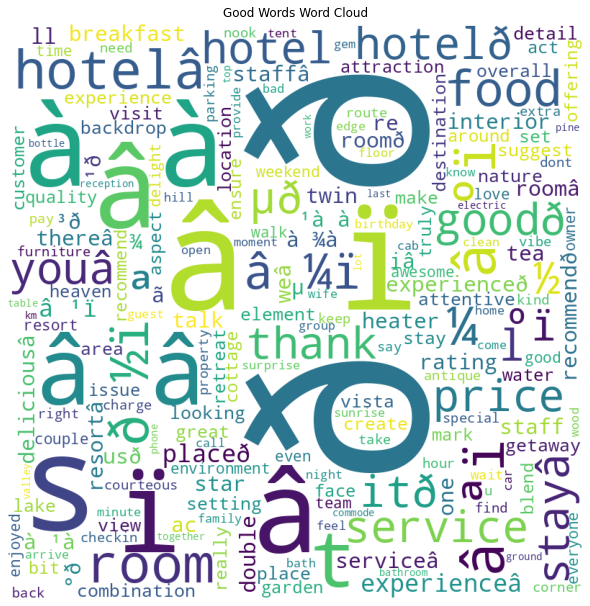

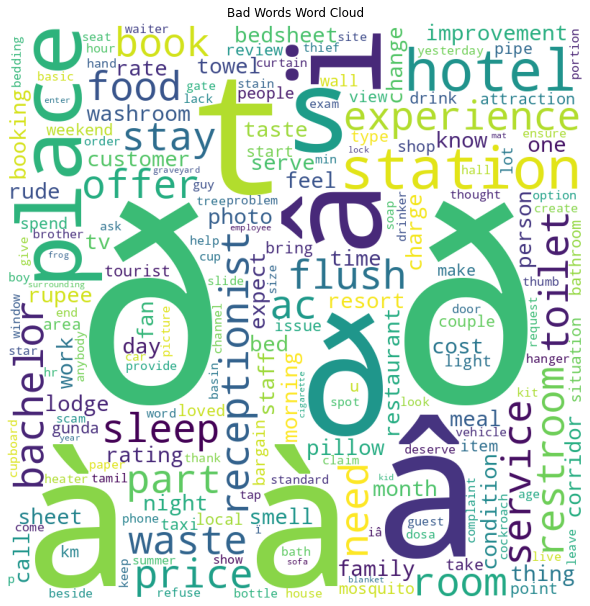

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the good and bad words lists from pickle files
good_words_counter = read_list_from_pickle("good_words.pkl")
good_words = list(good_words_counter.keys())
bad_words_counter = read_list_from_pickle("bad_words.pkl")
bad_words = list(bad_words_counter.keys())

# Convert the lists to strings for word cloud generation
good_words_text = ' '.join(good_words)
bad_words_text = ' '.join(bad_words)

# Generate word clouds for good and bad words
good_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(good_words_text)
bad_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(bad_words_text)

# Plot the word clouds
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(good_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Good Words Word Cloud")
plt.show()

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(bad_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Bad Words Word Cloud")
plt.show()
